# **Traveling Salesman Problem**

In [8]:
from sys import maxsize
from itertools import permutations
V = 4
def travellingSalesmanProblem(graph, s):
	vertex = []
	for i in range(V):
		if i != s:
			vertex.append(i)
	min_path = maxsize
	next_permutation=permutations(vertex)
	for i in next_permutation:
		current_pathweight = 0
		k = s
		for j in i:
			current_pathweight += graph[k][j]
			k = j
		current_pathweight += graph[k][s]
		min_path = min(min_path, current_pathweight)
	return min_path
if __name__ == "__main__":
	graph = [[0, 10, 15, 20], [10, 0, 35, 25],
			[15, 35, 0, 30], [20, 25, 30, 0]]
	s = 0
	print(travellingSalesmanProblem(graph, s))


80


# ***Multistage graph***

In [9]:
def shortestDist(graph):
    global INF
    dist = [0] * N
    dist[N - 1] = 0
    for i in range(N - 2, -1, -1):
        dist[i] = INF
        for j in range(N):
            if graph[i][j] == INF:
                continue
            dist[i] = min(dist[i],
                          graph[i][j] + dist[j])
    return dist[0]
N = 8
INF = 999999999999
graph = [[INF, 1, 2, 5, INF, INF, INF, INF],
         [INF, INF, INF, INF, 4, 11, INF, INF],
         [INF, INF, INF, INF, 9, 5, 16, INF],
         [INF, INF, INF, INF, INF, INF, 2, INF],
         [INF, INF, INF, INF, INF, INF, INF, 18],
         [INF, INF, INF, INF, INF, INF, INF, 13],
         [INF, INF, INF, INF, INF, INF, INF, 2]]
print(shortestDist(graph))



9


# **Fibonacci Sequence**

In [ ]:
FibArray = [0, 1]
def fibonacci(n):
    if n < 0:
        print("Incorrect input")
    elif n < len(FibArray):
        return FibArray[n]
    else:
        FibArray.append(fibonacci(n - 1) + fibonacci(n - 2))
        return FibArray[n]
print(fibonacci(9))


34


# **Optimal binary search tree**

In [ ]:
def optCost(freq, i, j):
	if j < i:
		return 0
	if j == i:
		return freq[i]
	fsum = Sum(freq, i, j)
	Min = 999999999999
	for r in range(i, j + 1):
		cost = (optCost(freq, i, r - 1) +
				optCost(freq, r + 1, j))
		if cost < Min:
			Min = cost
	return Min + fsum
def optimalSearchTree(keys, freq, n):
	return optCost(freq, 0, n - 1)
def Sum(freq, i, j):
	s = 0
	for k in range(i, j + 1):
		s += freq[k]
	return s
if __name__ == '__main__':
	keys = [10, 12, 20]
	freq = [34, 8, 50]
	n = len(keys)
	print("Cost of Optimal BST is",
		optimalSearchTree(keys, freq, n))

Cost of Optimal BST is 142


# **multi stage graph**


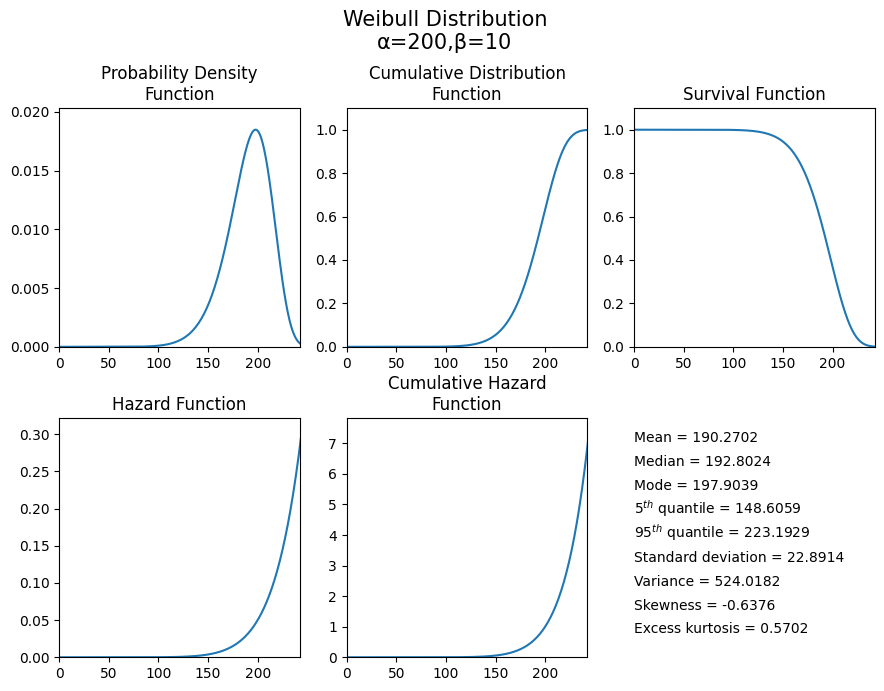

In [10]:
!pip install reliability
from reliability.Distributions import Weibull_Distribution
import matplotlib.pyplot as plt
dist = Weibull_Distribution(alpha=200, beta=10)  # this created the distribution object
dist.plot()
plt.show()

Results from Fit_Weibull_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 382/118 (23.6% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         28.8747        0.728006   27.4826   30.3375
     Beta         2.02949       0.0906926    1.8593   2.21527
    Gamma          20.384        0.818439   18.8413   22.0529 

Goodness of fit    Value
 Log-likelihood -1592.93
           AICc  3191.91
            BIC   3204.5
             AD   532.67 



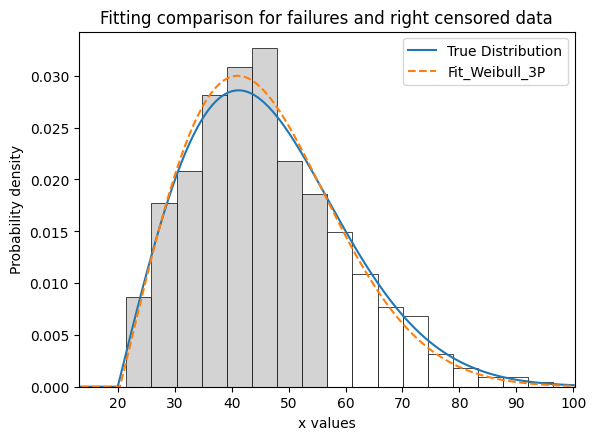

In [11]:
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_3P
from reliability.Other_functions import make_right_censored_data, histogram
import matplotlib.pyplot as plt

threshold = 55
dist = Weibull_Distribution(alpha=30, beta=2, gamma=20) # generate a weibull distribution
raw_data = dist.random_samples(500, seed=2)  # create some data from the distribution
data = make_right_censored_data(raw_data,threshold=threshold) #right censor some of the data
wbf = Fit_Weibull_3P(failures=data.failures, right_censored=data.right_censored, show_probability_plot=False, print_results=True)  # fit the Weibull_3P distribution
histogram(raw_data,white_above=threshold) # generates the histogram using optimal bin width and shades the censored part as white
dist.PDF(label='True Distribution')  # plots the true distribution's PDF
wbf.distribution.PDF(label='Fit_Weibull_3P', linestyle='--')  # plots to PDF of the fitted Weibull_3P
plt.title('Fitting comparison for failures and right censored data')
plt.legend()
plt.show()

# **floyd_warshall**

In [12]:
def floyd_warshall(graph):
    V = len(graph)
    dist = [[float('inf')] * V for _ in range(V)]

    for i in range(V):
        for j in range(V):
            if i == j:
                dist[i][j] = 0
            elif graph[i][j] != 0:
                dist[i][j] = graph[i][j]
    for k in range(V):
        for i in range(V):
            for j in range(V):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    return dist
if __name__ == "__main__":
    graph = [
        [0, 3, float('inf'), 7],
        [8, 0, 2, float('inf')],
        [5, float('inf'), 0, 1],
        [2, float('inf'), float('inf'), 0]
    ]
    shortest_paths = floyd_warshall(graph)
    print("Shortest path matrix:")
    for row in shortest_paths:
        print(row)

Shortest path matrix:
[0, 3, 5, 6]
[5, 0, 2, 3]
[3, 6, 0, 1]
[2, 5, 7, 0]


In [2]:
import sys
!{sys.executable} -m pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 99.4 MB/s eta 0:00:00


# **Lp_prob**

In [13]:
import pulp as p
Lp_prob = p.LpProblem('Problem', p.LpMinimize)
x = p.LpVariable("x", lowBound = 0)
y = p.LpVariable("y", lowBound = 0)
Lp_prob += 4 * x + 2 * y
Lp_prob += 3 * x + 2 * y >= 4
Lp_prob += 3 * x + 2 * y >= 7
Lp_prob += 2 * x + 2* y >= 7
print(Lp_prob)
status = Lp_prob.solve()
print(p.LpStatus[status])
print(p.value(x), p.value(y), p.value(Lp_prob.objective))

Problem:
MINIMIZE
4*x + 2*y + 0
SUBJECT TO
_C1: 3 x + 2 y >= 4

_C2: 3 x + 2 y >= 7

_C3: 2 x + 2 y >= 7

VARIABLES
x Continuous
y Continuous

Optimal
0.0 3.5 7.0


# **interpolate**

In [14]:
from scipy.interpolate import interp1d
X = [1,2,3,4,5]
Y = [11,2.2,3.5,-88,1]
interpolate_x = 2.5
y_interp = interp1d(X, Y)
print("Value of Y at x = {} is".format(interpolate_x),
	y_interp(interpolate_x))

Value of Y at x = 2.5 is 2.85


# **Strassen's matrix multiplication**

In [15]:
import numpy as np
def strassen(A, B):
    if len(A) == 1:
        return A * B
    mid = len(A) // 2
    A11 = A[:mid, :mid]
    A12 = A[:mid, mid:]
    A21 = A[mid:, :mid]
    A22 = A[mid:, mid:]
    B11 = B[:mid, :mid]
    B12 = B[:mid, mid:]
    B21 = B[mid:, :mid]
    B22 = B[mid:, mid:]
    M1 = strassen(A11 + A22, B11 + B22)
    M2 = strassen(A21 + A22, B11)
    M3 = strassen(A11, B12 - B22)
    M4 = strassen(A22, B21 - B11)
    M5 = strassen(A11 + A12, B22)
    M6 = strassen(A21 - A11, B11 + B12)
    M7 = strassen(A12 - A22, B21 + B22)
    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6
    C = np.zeros((len(A), len(B)))
    C[:mid, :mid] = C11
    C[:mid, mid:] = C12
    C[mid:, :mid] = C21
    C[mid:, mid:] = C22
    return C
if __name__ == "__main__":
    A = np.array([[1, 2], [3, 4]])
    B = np.array([[5, 6], [7, 8]])
    C = strassen(A, B)
    print("Result of Strassen's matrix multiplication:")
    print(C)

Result of Strassen's matrix multiplication:
[[19. 22.]
 [43. 50.]]
